# Proyek Analisis Data: [Air-Quality-Dataset]
- **Nama:** [Nathanael Dennis Gunawan]
- **Email:** [dennisgunawan100@gmail.com]
- **ID Dicoding:** [MC325D5Y2201]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan kualitas udara di ketiga lokasi selama periode 2013-2017?
- Bagaimana hubungan antara suhu, kelembaban, tekanan udara dengan tingkat polusi udara (PM2.5)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

## Data Wrangling

### Gathering Data

In [3]:
Dongsi_df = pd.read_csv("Data/PRSA_Data_Dongsi_20130301-20170228.csv")
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


Kode kode tersebut digunakan untuk membaca dataset dari stasiun Dongsi dan memunculkan 5 baris pertama

In [4]:
Gucheng_df = pd.read_csv("Data/PRSA_Data_Gucheng_20130301-20170228.csv")
Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Kode kode tersebut digunakan untuk membaca dataset dari stasiun Gucheng dan memunculkan 5 baris pertama

In [5]:
Huairou_df = pd.read_csv("Data/PRSA_Data_Huairou_20130301-20170228.csv")
Huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


Kode kode tersebut digunakan untuk membaca dataset dari stasiun Huairou dan memunculkan 5 baris pertama

**Insight:**
- Ketiga stasiun memiliki jumlah observasi yang sama, hal ini menunjukkan kelengkapan data secara keseluruhan. Namun, missing values kemungkinan ada, hal ini harus diperiksa lebih lanjut
- Ketiga Dataset berisi variabel PM2.5, Suhu(TEMP), Kelembaban(DEWP), dan Tekanan Udara(PRES). semua kolom harus dianalisis lebih lanjut untuk mengetahui faktor yang memengaruhi kualitas udara
- Kolom tanggal masih terpisah, hal ini harus digabungkan untuk memudahkan proses analisis data
- Dengan melihat 5 baris data tersebut bisa kita lihat bahwa PM2.5 bervariasi di tiap stasiun. Stasiun Gucheng menjadi stasiun yang nilai awal nya lebih tinggi dibanding stasiun Huairou yang kemungkinan lebih sedikit terpapar polusi

### Assessing Data

Menilai tabel Dongsi_df

In [6]:
Dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Mengecek informasi umum dari setiap kolom dalam dataset Dongsi

In [7]:
Dongsi_df.isna().sum()
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


Mengecek missing value dan duplikat data dalam dataset Dongsi

In [8]:
Dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Mengecek statistik deskriptif dari dataset Dongsi

Menilai tabel Gucheng_df

In [9]:
Gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Mengecek informasi umum dari setiap kolom dalam dataset Gucheng

In [10]:
Gucheng_df.isna().sum()
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


Mengecek missing value dan duplikat data dalam dataset Gucheng

In [11]:
Gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


Mengecek statistik deskriptif dari dataset Gucheng

Menilai tabel Huairou_df

In [12]:
Huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Mengecek informasi umum dari setiap kolom dalam dataset Huairou

In [13]:
Huairou_df.isna().sum()
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())

Jumlah duplikasi:  0


Mengecek missing value dan duplikat data dalam dataset Huairou

In [14]:
Huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Mengecek statistik deskriptif dari dataset Huairou

**Insight:**
- Dapat dilihat bahwa beberapa data masih memiliki missing values terutama pada kolom PM2.5, yang dapat berdampak kepada akurasi analisis data
- Stasiun Huairou memiliki lebih sedikit missing value daripada stasiun Dongsi dan Gucheng, yang kemungkinan disebabkan oleh perbedaan lokasi
- PM2.5 tertingggi terdapat di stasiun Gucheng yang menandakan tingkat polusi lebih tinggi dibanding area Dongsi dan Huairou
- PM2.5 terendah terdapat di stasiun Huairou yang kemungkinan diakibatkan oleh lokasi stasiun yang jauh darin kota
- Distribusi PM2.5 tidak normal karena beberapa outlier menunjukkan lonjakan polusi pada waktu tertentu
- Analisis awal menampilkan bahwa semakin dingin suhu maka semakin tinggi konsentrasi polusi udara

### Cleaning Data

Membersihkan tabel Dongsi_df

In [15]:
Dongsi_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())

Dongsi_df = Dongsi_df.dropna(how='all')

Dongsi_df.fillna(Dongsi_df.median(numeric_only=True), inplace=True)

Dongsi_df.isnull().sum()

Jumlah duplikasi:  0


No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

- Membersihkan nilai duplikat yang ada di dataset Dongsi
- Menghapus seluruh baris yyang memiliki nilai NaN
- Mengisi nilai NaN pada kolom dengan nilai median
- Mengetahui jumlah data yang hilang di setiap kolom

Membersihkan tabel Gucheng_df

In [16]:
Gucheng_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())

Gucheng_df = Gucheng_df.dropna(how='all')

Gucheng_df.fillna(Gucheng_df.median(numeric_only=True), inplace=True)

Gucheng_df.isnull().sum()

Jumlah duplikasi:  0


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         159
WSPM         0
station      0
dtype: int64

- Membersihkan nilai duplikat yang ada di dataset Gucheng
- Menghapus seluruh baris yang memiliki nilai NaN
- Mengisi nilai NaN pada kolom dengan nilai median
- Mengetahui jumlah data yang hilang di setiap kolom

Membersihkan tabel Huairou_df

In [17]:
Huairou_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())

Huairou_df = Huairou_df.dropna(how='all')

Huairou_df.fillna(Huairou_df.median(numeric_only=True), inplace=True)

Huairou_df.isnull().sum()

Jumlah duplikasi:  0


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         302
WSPM         0
station      0
dtype: int64

- Membersihkan nilai duplikat yang ada di dataset Huairou
- Menghapus seluruh baris yyang memiliki nilai NaN
- Mengisi nilai NaN pada kolom dengan nilai median
- Mengetahui jumlah data yang hilang di setiap kolom

**Insight:**
- Nilai nilai missing values diisi menggunakan nilai median per lokasi
- Kolom lain seperti suhu, tekanan udara dan kelembaban tidak memiliki banyak missing values sehingga tidak perlu dilakukan imputasi tambahan
- Dari ketiga dataset tidak ditemukan data duplikat sehingga tidak perlu dilakukan penghapusan data ganda
- Di stasiun Gucheng menunjukan PM2.5 memiliki outlier signifikan, yang bisa menunjukkkan kondisi ekstrim polusi udara
- Outlier tidak dihapus karena dapat merepresentasikan kejadian polusi tinggi yang penting dalam analisis
- Mengubah kolom waktu menjadi datetime agar memudahkan proses analisis tren waktu
- Data waktu kemudian disortir berdasarkan waktu untuk memastikan analisis dilakukan secara kronologis

## Exploratory Data Analysis (EDA)

### Explore Dongsi_df

In [18]:
Dongsi_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2926,2927,2013,6,30,22,160.0,32.0,9.7104,62.0006,1000.0,94.0,25.8,998.8,23.5,0.0,ESE,1.9,Dongsi
19618,19619,2015,5,27,10,3.0,150.0,26.0000,63.0000,1100.0,260.0,26.6,1002.5,16.5,0.0,SSE,1.9,Dongsi
26693,26694,2016,3,17,5,239.0,239.0,21.0000,109.0000,2100.0,3.0,6.4,1009.1,0.7,0.0,SSE,1.4,Dongsi
25811,25812,2016,2,9,11,25.0,27.0,10.0000,37.0000,900.0,36.0,5.4,1020.0,-12.1,0.0,E,1.4,Dongsi
1495,1496,2013,5,2,7,81.0,143.0,39.0000,77.0000,1500.0,24.0,16.1,1010.7,3.8,0.0,SW,0.7,Dongsi


Mengambil 5 baris acak dari dataset Dongsi

In [19]:
Dongsi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34986,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.655404,109.952923,18.369798,53.393550,1299.974703,56.962841,13.672019,1012.547221,2.447850,0.063983,NaN,1.860641,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.721734,97.489403,22.717797,33.204335,1139.664773,57.508815,11.455171,10.263134,13.806763,0.786059,NaN,1.280133,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


Memberikan ringkasan statistik dari semua jenis data dalam DataFrame

In [20]:
Dongsi_df.No.is_unique

True

Mengetahui bahwa primary key dari dataset Dongsi adalah kolom No

In [21]:
Dongsi_df.No.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
35059    35060
35060    35061
35061    35062
35062    35063
35063    35064
Name: No, Length: 35064, dtype: int64>

Mengetahui panjang dan tipe data dari kolom No

In [22]:
Dongsi_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"]
})

PM2.5                                PM10                               \
         max  min        mean         std    max  min        mean         std   
month                                                                           
1      681.0  3.0  100.160484  109.693764  955.0  5.0  118.292406  121.426464   
2      737.0  3.0   93.205383  107.732411  876.0  5.0  109.005900  113.010985   
3      520.0  3.0  100.015558   91.713987  891.0  3.0  142.623353  115.688993   
4      460.0  3.0   76.835069   57.720977  663.0  3.0  121.094097   80.067398   
5      408.0  3.0   69.824227   54.247084  848.0  5.0  108.213642   76.242178   
6      515.0  3.0   72.801042   59.593234  551.0  2.0   87.440486   61.880534   
7      287.0  3.0   79.198253   56.321243  354.0  2.0   85.928427   56.644626   
8      235.0  3.0   58.683031   43.619946  349.0  2.0   73.830175   52.716204   
9      323.0  3.0   67.132604   56.301079  316.0  2.0   84.635729   60.089259   
10     450.0  3.0   97.681788   94.417029  508.0  3.0  122.503360  101.131760   
11     685.0  3.0   99.650035   98.036851  794.0  5.0  126.702847  111.116178   
12     680.0  3.0  112.501882  128.496979  737.0  2.0  138.437466  139.185381   

            SO2                                
            max     min       mean        std  
month                                          
1      300.0000  1.0000  33.287063  30.958333  
2      278.0000  2.0000  30.433260  33.822403  
3      198.0000  2.0000  30.359783  28.767931  
4      111.0000  2.0000  16.503801  15.354073  
5      157.0000  2.0000  17.502621  18.928561  
6       89.0000  0.2856  10.824352  12.690761  
7      109.0992  0.2856   7.355403   7.465145  
8       55.0000  0.2856   6.001276   5.691135  
9      104.0000  1.0000   8.185375   9.817773  
10     178.0000  1.0000  12.232286  15.423401  
11     196.0000  2.0000  19.297882  19.019208  
12     164.0000  2.0000  28.922434  25.682248

Mengelompokkan data berdasarkan bulan untuk melihat distribusi polusi tiap bulan

In [23]:
Dongsi_df.groupby(by="year").No.nunique().sort_values(ascending=False)

year
2016    8784
2014    8760
2015    8760
2013    7344
2017    1416
Name: No, dtype: int64

Mengelompokkan data berdasarkan tahun untuk melihat jumlah nilai unik untuk tiap tahun

### Explore Gucheng_df

In [24]:
Gucheng_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
19494,19495,2015,5,22,6,62.0,152.0,6.0,67.0,900.0,2.0,15.3,1002.9,9.6,0.0,SE,0.5,Gucheng
12274,12275,2014,7,25,10,96.0,96.0,3.0,46.0,1100.0,132.0,31.1,998.2,18.8,0.0,ESE,1.3,Gucheng
10315,10316,2014,5,4,19,22.0,60.0,2.0,17.0,400.0,81.0,13.5,1010.5,-9.1,0.0,WNW,0.5,Gucheng
19889,19890,2015,6,7,17,11.0,46.0,2.0,21.0,300.0,111.0,24.4,1001.4,6.6,0.0,NNE,1.4,Gucheng
11731,11732,2014,7,2,19,89.0,105.0,2.0,30.0,1000.0,128.0,25.2,994.7,22.9,0.0,WSW,0.7,Gucheng


Mengambil 5 baris acak dari dasaset Gucheng

In [25]:
Gucheng_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34905,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.412651,118.646161,15.245193,55.759226,1307.034309,57.430945,13.865885,1008.829122,2.611008,0.064374,NaN,1.342899,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.092868,96.237612,21.074340,36.133665,1187.465580,56.452790,11.284697,10.096057,13.772971,0.838142,NaN,1.150436,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,25.000000,46.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


Memberikan ringkasan statistik dari semua jenis data dalam DataFrame

In [26]:
Gucheng_df.No.is_unique

True

Mengetahui bahwa primary key dari dasaset Gucheng adalah kolom No

In [27]:
Gucheng_df.No.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
35059    35060
35060    35061
35061    35062
35062    35063
35063    35064
Name: No, Length: 35064, dtype: int64>

Mengetahui panjang dan tipe datadari kolom No

In [28]:
Gucheng_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"]
})

PM2.5                                PM10                               \
         max  min        mean         std    max  min        mean         std   
month                                                                           
1      767.0  3.0  100.103696  106.735094  994.0  5.0  121.703528  115.375597   
2      770.0  3.0   89.317109   98.896309  817.0  5.0  107.219764  104.327456   
3      458.0  3.0   98.191297   89.421614  983.0  5.0  151.573925  115.147353   
4      533.0  2.0   75.431944   55.357886  800.0  3.0  135.662153   86.133604   
5      337.0  3.0   67.067675   48.717172  986.0  4.0  129.706116   87.646906   
6      500.0  2.0   72.290278   58.355051  647.0  2.0  104.094444   69.917538   
7      375.0  3.0   71.514113   51.345864  862.0  2.0   99.928427   64.655451   
8      276.0  3.0   54.652520   41.488943  325.0  3.0   86.889315   60.087545   
9      311.0  3.0   65.507882   56.039257  356.0  2.0   95.923160   66.886178   
10     465.0  3.0   97.575941   93.055211  564.0  3.0  126.449933  100.075828   
11     546.0  3.0   99.538125   92.022812  699.0  3.0  128.025208  103.726086   
12     741.0  3.0  109.611391  121.841332  741.0  3.0  135.213374  128.172572   

         SO2                                
         max     min       mean        std  
month                                       
1      500.0  1.0000  33.375638  30.075630  
2      500.0  2.0000  28.639012  30.778127  
3      248.0  2.0000  27.467554  26.820633  
4       88.0  2.0000  12.867646  12.182758  
5      500.0  2.0000  13.382188  16.452402  
6      227.0  2.0000   5.826388   9.570658  
7       76.0  0.2856   3.806977   3.465860  
8      218.0  1.0000   3.174294   4.755015  
9       34.0  1.0000   4.578121   4.479107  
10      80.0  1.0000   6.744945   8.709340  
11     124.0  1.0000  15.813090  15.891958  
12     165.0  1.0000  27.748315  22.752859

Mengelompokkan data berdasarkan bulan untuk melihat distribusi polusi tiap bulan

In [29]:
Gucheng_df.groupby(by="year").No.nunique().sort_values(ascending=False)

year
2016    8784
2014    8760
2015    8760
2013    7344
2017    1416
Name: No, dtype: int64

Mengelompokkan data berdasarkan tahun untuk melihat jumlah nilai unik untuk tiap tahun

### Explore Huairou_df

In [30]:
Huairou_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25432,25433,2016,1,24,16,6.0,60.0,2.0,4.0,200.0,50.0,-4.3,1026.4,-25.1,0.0,WNW,4.6,Huairou
5178,5179,2013,10,2,18,12.0,89.0,4.0,50.0,400.0,43.0,14.4,1009.1,8.1,0.0,NW,1.0,Huairou
16832,16833,2015,1,31,8,24.0,26.0,2.0,43.0,1300.0,6.0,-12.0,1029.0,-22.6,0.0,NW,1.7,Huairou
1719,1720,2013,5,11,15,47.0,69.0,4.0,25.0,800.0,49.0,32.3,984.3,-7.9,0.0,W,8.2,Huairou
20846,20847,2015,7,17,14,31.0,31.0,2.0,9.0,500.0,73.0,26.9,997.9,18.2,0.0,WSW,1.0,Huairou


Mengambil 5 baris acak dari dataset Huairou

In [31]:
Huairou_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34762,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,NaN,Huairou
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4943,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.011408,90.984486,11.894565,32.146806,1013.528976,59.469384,12.447105,1007.598117,2.239317,0.067833,NaN,1.651529,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,70.346593,82.428022,18.678989,25.911379,881.419159,53.736632,11.742636,10.014530,14.041928,0.848384,NaN,1.198377,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,29.000000,2.000000,13.000000,400.000000,19.000000,2.100000,999.400000,-9.600000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,NaN,1.300000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,96.000000,128.000000,13.000000,45.000000,1300.000000,81.000000,22.300000,1015.500000,15.300000,0.000000,NaN,2.000000,NaN


Memberikan ringkasan statistik dari semua jenis data dalam DataFrame

In [32]:
Huairou_df.No.is_unique

True

Mengetahui bahwa primary key dari dataset Huairou adalah kolom No

In [33]:
Huairou_df.No.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
35059    35060
35060    35061
35061    35062
35062    35063
35063    35064
Name: No, Length: 35064, dtype: int64>

Mengetahui panjang dan tipe data dari kolom No

In [34]:
Huairou_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"]
})

PM2.5                              PM10                               \
         max  min       mean        std    max  min        mean         std   
month                                                                         
1      558.0  2.0  78.369288  80.502884  750.0  5.0   93.587265   92.045558   
2      762.0  3.0  79.758149  92.151280  991.0  3.0   91.161173  100.423881   
3      534.0  3.0  88.828192  86.230974  835.0  3.0  120.744388   98.588843   
4      288.0  2.0  66.741146  53.758852  620.0  3.0  107.438090   80.726406   
5      345.0  3.0  54.205208  42.744405  695.0  3.0   93.975672   68.480067   
6      324.0  3.0  55.726736  48.777176  529.0  2.0   80.082986   65.670827   
7      384.0  3.0  66.716163  55.330679  640.0  2.0   82.822345   59.778834   
8      234.0  3.0  47.566835  40.192033  748.0  3.0   64.885215   53.153392   
9      318.0  3.0  54.399132  50.375159  432.0  3.0   68.583854   55.415305   
10     379.0  3.0  78.882392  79.897579  411.0  3.0   96.125336   83.350700   
11     422.0  3.0  76.547465  73.433606  993.0  3.0   96.677153   88.856263   
12     559.0  3.0  80.619489  95.227141  948.0  3.0   95.386156  104.774645   

            SO2                                
            max     min       mean        std  
month                                          
1      254.0000  1.0000  22.407258  26.205012  
2      315.0000  1.0000  21.476106  31.277508  
3      160.0000  2.0000  22.125843  24.834614  
4      110.0000  0.8568  11.809190  14.142504  
5      103.9584  2.0000  10.317394  12.803741  
6      120.0000  0.2856   6.085702   9.004774  
7       93.0000  0.2856   4.294345   5.216286  
8       34.0000  1.0000   3.414122   2.834148  
9       62.0000  1.0000   5.015672   6.824369  
10     103.0000  0.5712   6.787394  10.258485  
11     193.0000  1.0000  11.598958  17.199096  
12     196.0000  1.0000  17.831195  20.937090

Mengelompokkan data berdasarkan bulan untuk melihat distribusi polusi tiap bulan

In [35]:
Huairou_df.groupby(by="year").No.nunique().sort_values(ascending=False)

year
2016    8784
2014    8760
2015    8760
2013    7344
2017    1416
Name: No, dtype: int64

Mengelompokkan data berdasarkan tahun untuk melihat jumlah nilai unik untuk tiap tahun

### Explore All Data

In [36]:
Dongsi_df["station"] = "Dongsi"
Gucheng_df["station"] = "Gucheng"
Huairou_df["station"] = "Huairou"

all_df = pd.concat([Dongsi_df, Gucheng_df, Huairou_df], ignore_index=True)

all_df["datetime"] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])

all_df = all_df.sort_values(by="datetime").reset_index(drop=True)

print(all_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   1  2013      3    1     0    7.0   7.0  3.0   2.0  100.0  91.0  -2.3   
2   1  2013      3    1     0    6.0  18.0  5.0  50.0  800.0  88.0   0.1   
3   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
4   2  2013      3    1     1    4.0   4.0  3.0  25.0  100.0  92.0  -2.7   

     PRES  DEWP  RAIN   wd  WSPM  station            datetime  
0  1024.5 -21.4   0.0  NNW   5.7   Dongsi 2013-03-01 00:00:00  
1  1020.3 -20.7   0.0  WNW   3.1  Huairou 2013-03-01 00:00:00  
2  1021.1 -18.6   0.0   NW   4.4  Gucheng 2013-03-01 00:00:00  
3  1025.1 -22.1   0.0   NW   3.9   Dongsi 2013-03-01 01:00:00  
4  1020.8 -20.5   0.0  NNW   1.5  Huairou 2013-03-01 01:00:00  


- Menambahkan informasi stasiun pada setiap dataset
- Menggabungkan dataset secara vertikal
- Mengurutkan berdasarkan datetime
- Menampilkan 5 baris pertama

In [37]:
dongsi_summary = all_df[all_df["station"] == "Dongsi"].groupby("month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "TEMP": "mean",
    "PRES": "mean"
}).reset_index()

print(dongsi_summary.head())

   month       PM2.5        PM10        SO2        NO2           CO  \
0      1  100.160484  118.292406  33.287063  58.902184  1806.619624   
1      2   93.205383  109.005900  30.433260  45.946903  1407.817109   
2      3  100.015558  142.623353  30.359783  61.589393  1392.771169   
3      4   76.835069  121.094097  16.503801  47.213632   916.228472   
4      5   69.824227  108.213642  17.502621  45.170296   931.126680   

          O3       TEMP         PRES  
0  27.811477  -1.716067  1024.025454  
1  41.835827   1.217238  1022.169371  
2  51.536579   8.439468  1015.861229  
3  71.744455  15.439931  1010.158681  
4  91.608218  21.709039  1004.202688  


- Mengelompokkan data dari stasiun Dongsi
- Menghitung rata-rata dari parameter polusi udara
- Menampilkan 5 baris utama

In [38]:
gucheng_summary = all_df[all_df["station"] == "Gucheng"].groupby("month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "TEMP": "mean",
    "PRES": "mean"
}).reset_index()

print(dongsi_summary.head())

   month       PM2.5        PM10        SO2        NO2           CO  \
0      1  100.160484  118.292406  33.287063  58.902184  1806.619624   
1      2   93.205383  109.005900  30.433260  45.946903  1407.817109   
2      3  100.015558  142.623353  30.359783  61.589393  1392.771169   
3      4   76.835069  121.094097  16.503801  47.213632   916.228472   
4      5   69.824227  108.213642  17.502621  45.170296   931.126680   

          O3       TEMP         PRES  
0  27.811477  -1.716067  1024.025454  
1  41.835827   1.217238  1022.169371  
2  51.536579   8.439468  1015.861229  
3  71.744455  15.439931  1010.158681  
4  91.608218  21.709039  1004.202688  


- Mengelompokkan data dari stasiun Gucheng
- Menghitung rata-rata dari parameter polusi udara
- Menampilkan 5 baris utama

In [39]:
huairou_summary = all_df[all_df["station"] == "Huairou"].groupby("month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "TEMP": "mean",
    "PRES": "mean"
}).reset_index()

print(huairou_summary.head())

   month      PM2.5        PM10        SO2        NO2           CO         O3  \
0      1  78.369288   93.587265  22.407258  44.728730  1424.899194  28.182460   
1      2  79.758149   91.161173  21.476106  35.977802  1173.156342  43.633665   
2      3  88.828192  120.744388  22.125843  40.940991  1087.842070  56.236357   
3      4  66.741146  107.438090  11.809190  31.614909   753.148264  76.084537   
4      5  54.205208   93.975672  10.317394  26.618302   721.933468  92.638950   

        TEMP         PRES  
0  -3.376065  1018.762105  
1  -0.130986  1017.028024  
2   7.268349  1010.897991  
3  14.466528  1005.294306  
4  20.574866   999.445665  


- Mengelompokkan data dari stasiun Huairou
- Menghitung rata-rata dari parameter polusi udara
- Menampilkan 5 baris utama

In [40]:
all_df.to_csv("Dashboard/all_data.csv", index=False)

Mengekspor data yang telah digabungkan dan dibersihkan ke file csv yang baru

**Insight:**
- PM2.5 cenderung menurun dari tahun ke tahun, hal ini menunjukkan adanya perbaikan kualitas udara di ketiga daerah
- Tahun 2013 dan 2014 menjadi tahun yang memiliki rata rata PM2.5 tertinggi terutama di stasiun Gucheng, hal ini mungkin diakibatkan oleh aktivitas industri dan kepadatan lalu lintas
- Di stasiun Huairoun memiliki PM2.5 lebih rendah secara konsisten, hal ini semakin menunjukkan bahwa daerah ini masih sedikit terpapar polusi dibanding daerah lain
- PM2.5 tertinggi terjadi saat musim dingin, hal ini mungkin disebabkan oleh duhu dingin dan tekanan udara rendah membuat polutan terperangkap 
- PM2.5 terendah terjadi saat musim panas, hal ini mungkin disebabkan oleh hujan yang lebih sering turun yang membantu membersihkan udara
- Polusi udara lebih tinggi saat suhu sedang rendah
- Kelembaban yang tinggi terkadang membantu mengurangi polusi dengan membuat polusi lebih cepat mengendap
- Polusi lebih tinggi saat tekanan udara rendah, mungkin diakibatkan karena kurangnya sirkulasi udara

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren perubahan kualitas udara di ketiga lokasi selama periode 2013-2017?

In [41]:
all_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
71632,23878,2015,11,20,21,98.0,98.0,7.0,50.0,2600.0,2.0,2.6,1021.7,0.3,0.0,NE,0.8,Gucheng,2015-11-20 21:00:00
101166,33723,2017,1,4,2,222.0,256.0,2.0,103.0,4100.0,2.0,-4.4,1016.0,-7.8,0.0,NW,1.7,Huairou,2017-01-04 02:00:00
39040,13014,2014,8,25,5,46.0,46.0,4.0,25.0,700.0,49.0,19.6,1003.9,18.3,0.0,WNW,0.2,Gucheng,2014-08-25 05:00:00
71328,23777,2015,11,16,16,62.0,67.0,15.0,43.0,1200.0,25.0,9.0,1011.3,0.4,0.0,SW,1.4,Gucheng,2015-11-16 16:00:00
72010,24004,2015,11,26,3,3.0,5.0,2.0,12.0,300.0,57.0,-9.0,1029.8,-20.8,0.0,NNW,4.5,Dongsi,2015-11-26 03:00:00


Kode tersebut untuk mengambil 5 baris secara acak dalam dataset yang sudah digabungkan

In [42]:
df_selected_yearly = all_df.groupby(["year", "station"])[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean().reset_index()

Agregasi data tahunan untuk tiap stasiun

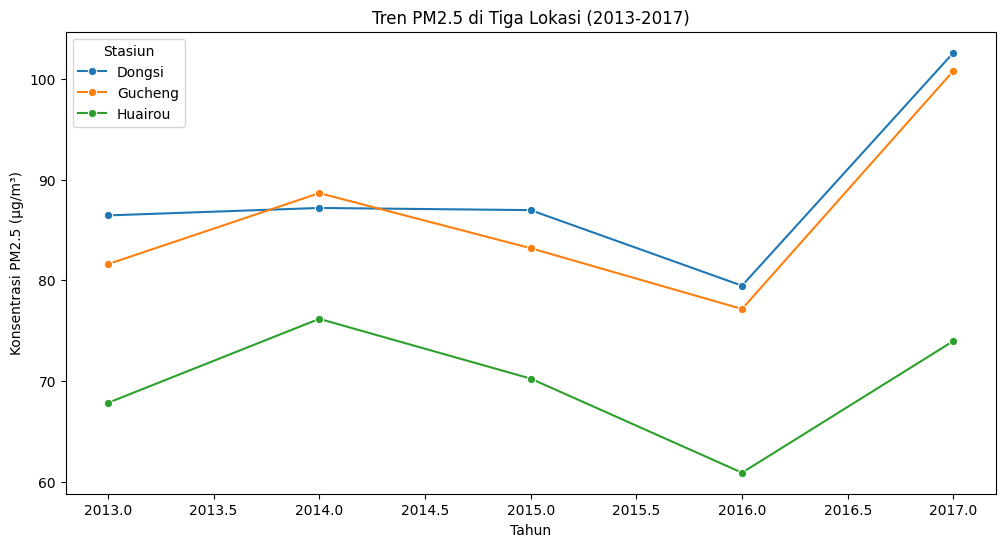

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_yearly, x="year", y="PM2.5", hue="station", marker="o")
plt.title("Tren PM2.5 di Tiga Lokasi (2013-2017)")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Stasiun")
plt.show()

Kode tersebut untuk mengetahui tren tahunan untuk PM2.5

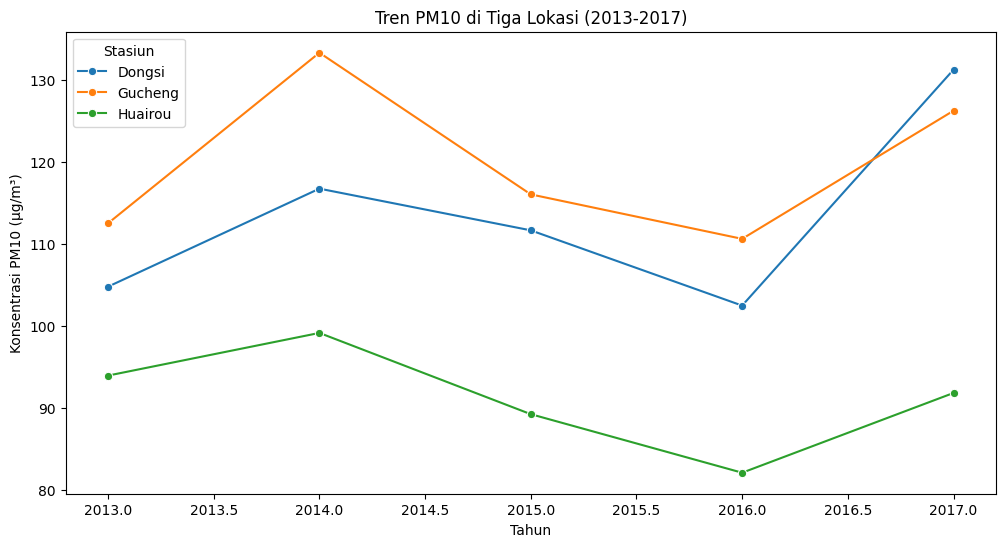

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_yearly, x="year", y="PM10", hue="station", marker="o")
plt.title("Tren PM10 di Tiga Lokasi (2013-2017)")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi PM10 (µg/m³)")
plt.legend(title="Stasiun")
plt.show()

Kode tersebut untuk mengetahui tren tahunan untuk PM10

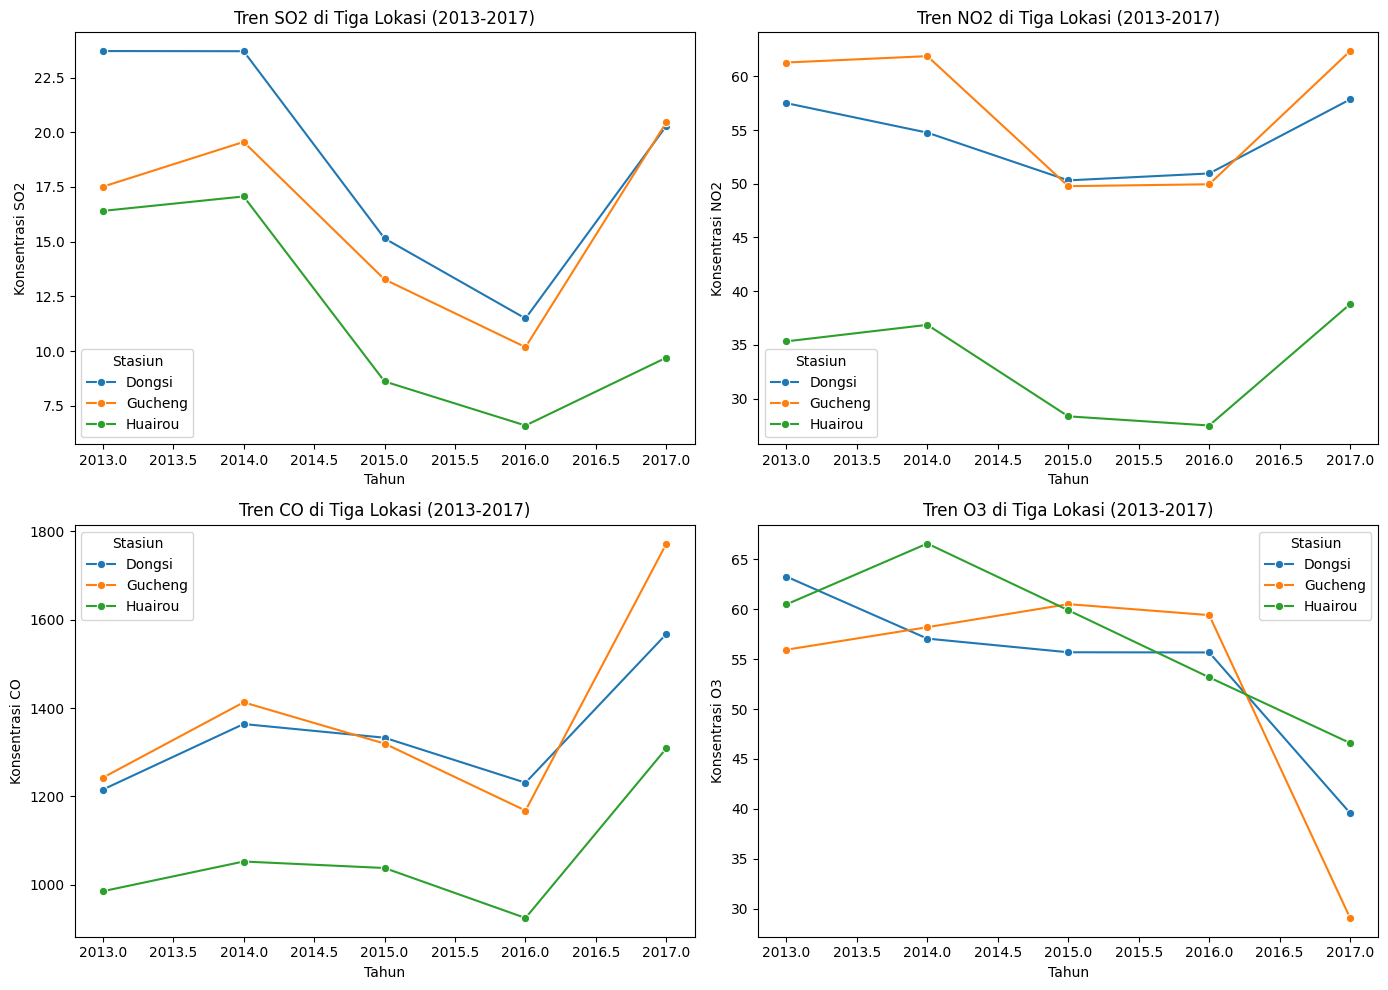

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
pollutants = ["SO2", "NO2", "CO", "O3"]
titles = ["Tren SO2", "Tren NO2", "Tren CO", "Tren O3"]

for i, ax in enumerate(axes.flat):
    sns.lineplot(data=df_selected_yearly, x="year", y=pollutants[i], hue="station", marker="o", ax=ax)
    ax.set_title(f"{titles[i]} di Tiga Lokasi (2013-2017)")
    ax.set_xlabel("Tahun")
    ax.set_ylabel(f"Konsentrasi {pollutants[i]}")
    ax.legend(title="Stasiun")

plt.tight_layout()
plt.show()

Kode tersebut untuk mengetahui tren tahunan dari gas polutan dari tahun 2013-2017

### Pertanyaan 2: Bagaimana hubungan antara suhu, kelembaban, tekanan udara dengan tingkat polusi udara (PM2.5)?

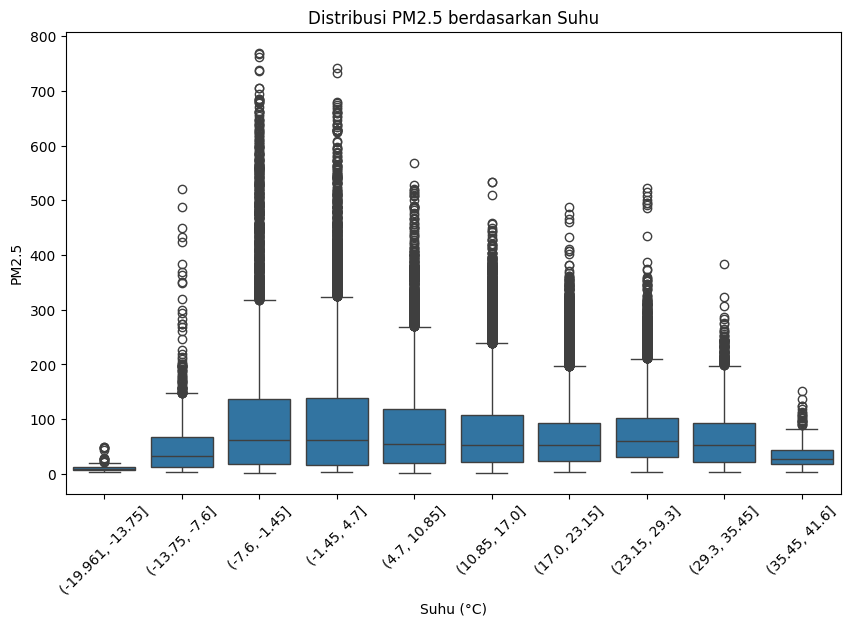

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x=pd.cut(all_df["TEMP"], bins=10), y="PM2.5")
plt.xticks(rotation=45)
plt.title("Distribusi PM2.5 berdasarkan Suhu")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM2.5")
plt.show()

Kode tersebut digunakan untuk melihat distribusi PM2.5 berdasarkan suhu menggunakan boxplot

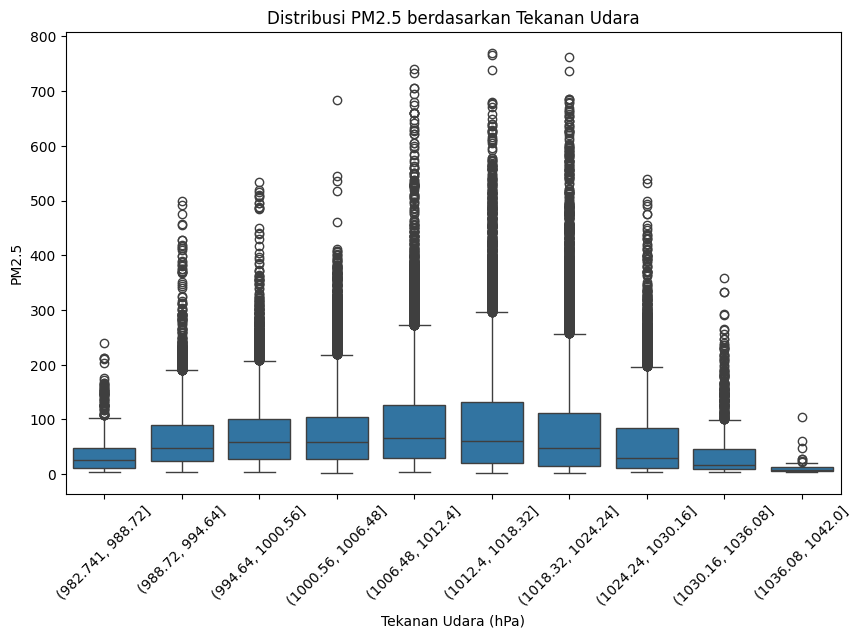

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x=pd.cut(all_df["PRES"], bins=10), y="PM2.5")
plt.xticks(rotation=45)
plt.title("Distribusi PM2.5 berdasarkan Tekanan Udara")
plt.xlabel("Tekanan Udara (hPa)")
plt.ylabel("PM2.5")
plt.show()

Kode tersebut digunakan untuk melihat distribusi PM2.5 berdasarkan tekanan udara menggunakan boxplot

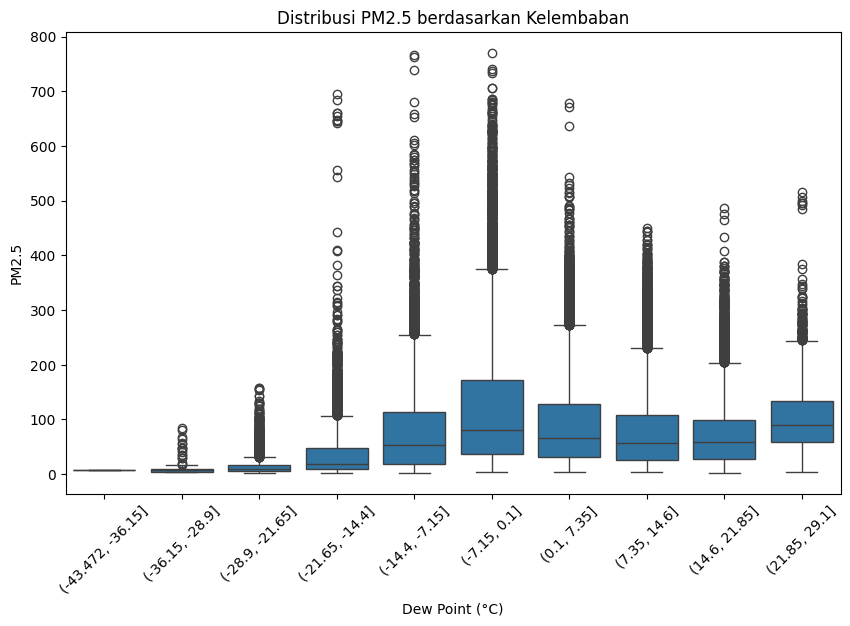

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x=pd.cut(all_df["DEWP"], bins=10), y="PM2.5")
plt.xticks(rotation=45)
plt.title("Distribusi PM2.5 berdasarkan Kelembaban")
plt.xlabel("Dew Point (°C)")
plt.ylabel("PM2.5")
plt.show()

Kode tersebut digunakan untuk melihat distribusi PM2.5 berdasarkan kelembapan menggunakan boxplot

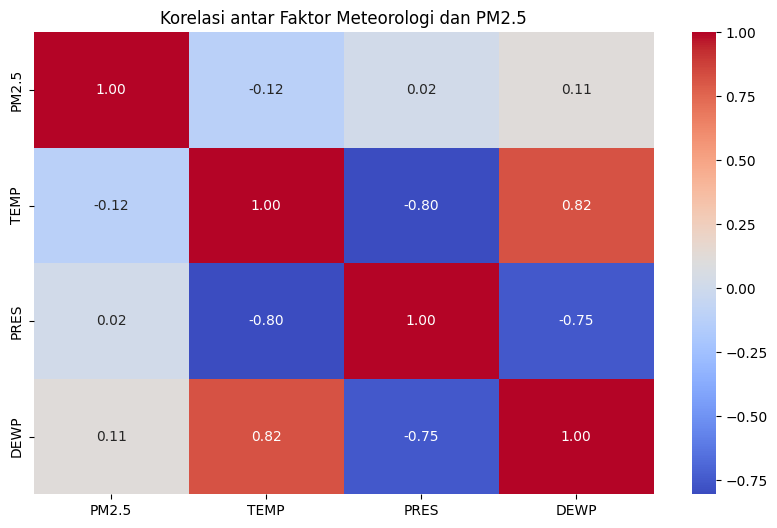

In [49]:
plt.figure(figsize=(10, 6))
correlation_matrix = all_df[["PM2.5", "TEMP", "PRES", "DEWP"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Faktor Meteorologi dan PM2.5")
plt.show()

Kode tersebut digunakan untuk membuat heatmap korelasi antara faktor meteorologi dan tingkat polusi PM2.5

**Insight:**
- Tren PM2.5 mengalami penurunan dari tahun 2013 - 2017, hal ini menunjukkan adanya peningkatan kualitas udara diketiga stasiun
- SO2 mengalami penurunan di semua lokasi
- Di tahun 2013 lah tingkat PM2.5 mencapai titik tertinggi terutama di stasiun Gucheng yang kemungkinan karena aktivitas Industri
- Tekanan udara yang lebih tinggi cenderung berkorelasi dengan tingkat PM2.5 yang lebih rendah
- Stasiun Huairou memiliki PM2.5 paling rendah dibanding stasiun lainnya, kemungkinan karena lokasinya yang jauh dari pusat kota dan daerah industri
- PM2.5 tertinggi terjadi pada musim dingin, yaiu bulan Desember sampai Februari
- Sebaliknya PM2.5 terendah terjadi pada musim panas, yaitu bulan Juni sampai Agustus. kemungkinan karena curah hujan yang lebih tinggi membantu membersihkan udara

## Analisis Lanjutan (Opsional)

Geospatial Analysis

In [50]:
station_coords = {
    "Dongsi": [39.929, 116.417],
    "Gucheng": [39.928, 116.342],
    "Huairou": [40.316, 116.637]
}

Mencatat kordinat dari ketiga stasiun

In [51]:
avg_pm25 = all_df.groupby("station")["PM2.5"].mean().reset_index()

Menghitung rata rata pm2.5 dari tiap stasiun

In [52]:
avg_pm25["latitude"] = avg_pm25["station"].map(lambda x: station_coords[x][0])
avg_pm25["longitude"] = avg_pm25["station"].map(lambda x: station_coords[x][1])

Menambah kordinat ke dataframe

In [53]:
def get_color(pm25):
    if pm25 < 50:
        return "green"
    elif pm25 < 100:
        return "yellow"
    elif pm25 < 150:
        return "orange"
    elif pm25 < 200:
        return "red"
    else:
        return "darkred"

Membuat fungsi untuk menentukan warna sesuai PM2.5

In [54]:
peta = folium.Map(location=[39.9, 116.4], zoom_start=10)

for _, row in avg_pm25.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["PM2.5"] / 10, 
        color=get_color(row["PM2.5"]),
        fill=True,
        fill_color=get_color(row["PM2.5"]),
        fill_opacity=0.7,
        popup=f"{row['station']}: {row['PM2.5']:.2f} µg/m³"
    ).add_to(peta)

peta

- Membuat peta interaktif dengan library folium
- Menambahkan marker untuk setiap stasiun
- Menampilkan peta

**Insight:**
- Gucheng memiliki tingkat PM2.5 tertinggi dibanding stasiun lainnya kemungkinan besar karena Gucheng merupakan daerah dengan kepadatan lalu lintas tinggi dan aktivitas industri yang lebih banyak dibandingkan lokasi lainnya
- Huairou memiliki tingkat PM2.5 yang paling rendah sepanjang tahun karena lokasi ini lebih jauh dari pusat kota dan lebih dekat dengan pegunungan
- Dongsi berada di tengah tengah antara Gucheng dan Huairou dalam hal tingkat polusi
- Polusi lebih tinggi di daerah pusat kota dan kawasan industri, sedangkan daerah pegunungan memiliki kualitas udara yang lebih baik
- Kawasan dengan polusi tinggi dapat dijadikan target kebijakan lingkungan, seperti pembatasan kendaraan atau peningkatan ruang hijau
- Analisis lebih lanjut dapat dilakukan dengan memetakan hubungan antara PM2.5 dan kepadatan penduduk atau zona industri

## Conclusion

- Conclution pertanyaan 1
- Berdasarkan analisis yang sudah dilakukan, dapat dsimpulkan bahwa tren PM2.5 mengalami penurunan dari tahun 2013 sampai 2017, yang menunjukkan adanya perbaikan kualitas udara. di tahun 2013 memiliki rata rata PM2.5 tertinggi dengan konsentrasi tertinggi tercatat di Gucheng, yang mungkin disebabkan oleh adanya aktiivitas industri dan kepadatan lalu lintas yang tinggi di daerah tersebut. sebaliknya, Huairou menjadi lokasi tingkat PM2.5 paling rendah, yang dapat dikaitkan dengan lokasinya yang lebih jauh dari pusat kota dan lebih dekat dengan kawasan hijau. Rekomendasi, strategi pengendalian polusi udara harus lebih difokuskan pada musim dingin, misalnya dengan membatasi emisi dari sumber industri dan transportasi pada periode ini. Selain itu, wilayah dengan tingkat polusi tertinggi, seperti Gucheng, dapat menjadi prioritas dalam kebijakan lingkungan, seperti penerapan zona rendah emisi atau peningkatan ruang hijau untuk membantu menyerap polutan


- Conclution pertanyaan 2
- Dari hasil visualisasi pola musiman, ditemukan bahwa PM2.5 mengalami fluktuasi signifikan sepanjang tahun, dengan konsentrasi tertinggi terjadi pada musim dingin yaitu bulan Desember sampai Februari. Kemungkinan besar hal ini diakibatkan oleh udara dingin yang menjebak polutan sehingga menyebabkan akumulasi PM2.5 dan Peningkatan penggunaan pemanas. Sebaliknya, musim panas memiliki tingkat PM2.5 lebih rendah mungkin disebabkan oleh curah hujan yang lebih tinggi dan angin yang lebih kuat. Rekomendasi, Meningkatkan pengawasan dan regulasi polusi udara di musim dingin, misalnya dengan pembatasan emisi dan Mendorong penggunaan energi ramah lingkungan untuk pemanas di musim dingin, guna mengurangi emisi yang berkontribusi pada peningkatan PM2.5